# Volume 4: Hysteresis
    <Name>
    <Class>
    <Date>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from scipy.integrate import solve_ivp

In [4]:
def embedding_alg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1e-7, maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, X

# Problem 1

Use the natural embedding algorithm to create a bifurcation diagram for the differential equation

$x = λx − x^3$

This type of bifurcation is called a pitchfork bifurcation (you should see a pitchfork in your
diagram)

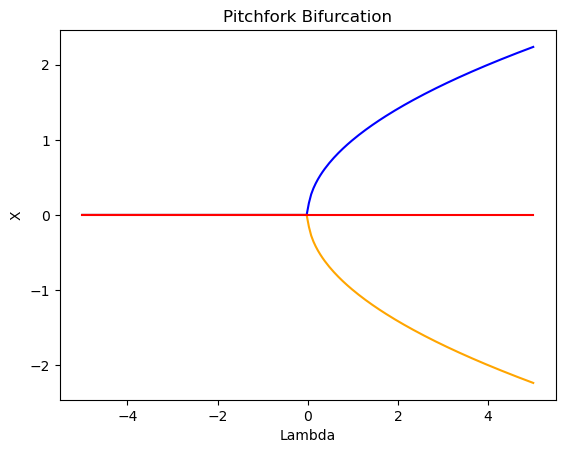

In [6]:
# Define the differential equation
def F(x, lmbda):
    return lmbda * x - x**3

# First curve shown in the bifurcation diagram
C1, X1 = embedding_alg(np.linspace(5, -5, 200), 2, F)

# Second curve shown in the bifurcation diagram
C2, X2 = embedding_alg(np.linspace(5,-5,200), -2, F)

# Third curve shown in the bifurcation diagram
C3, X3 = embedding_alg(np.linspace(5,-5,200), 0, F)

# Plot data
plt.plot(C1, X1, color = 'blue')
plt.plot(C2, X2, color = 'orange')
plt.plot(C3, X3, color = 'red')
plt.xlabel('Lambda')
plt.ylabel('X')
plt.title('Pitchfork Bifurcation')
plt.show()

# Problem 2
Find the trajectory of $x' = \lambda x-x^3,$
using the points 

$(\lambda, x_0)\in \left\{\left(\frac{1}{2},\frac{1}{2}\right), \left(\frac{1}{2},\frac{-1}{2}\right), \left(\frac{-1}{2},\frac{1}{2}\right), \left(\frac{-1}{2},\frac{-1}{2}\right) \right\}. $

and the initial condition $x(0)=x_0$ using solve_ivp.
Be sure to include a legend.

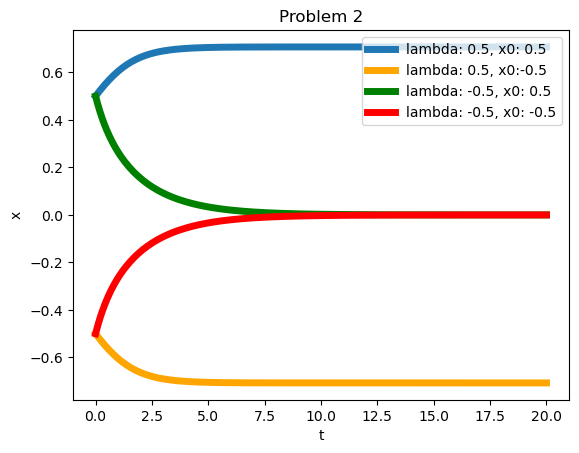

In [7]:
# Set the constants
lambda_1 = 1/2
lambda_2 = -1/2

# Element 1: the ODE function
def ode(t,y):
    return np.array([
        lambda_1 * y[0] - y[0]**3
    ])
    
# Element 2: The Time Domain
t_span = (0,20)

# Element 3: The Initial Conditions
y1 = np.array([1/2])
y2 = np.array([-1/2])

# Solve the Diff Equation
sol_1 = solve_ivp(ode, t_span, y1, max_step = 0.1)
sol_2 = solve_ivp(ode, t_span, y2, max_step = 0.1)

# Element 1: the ODE function
def ode(t,y):
    return np.array([
        lambda_2 * y[0] - y[0]**3
    ])
    
# Solve the Diff Equation
sol_3 = solve_ivp(ode, t_span, y1, max_step = 0.1)
sol_4 = solve_ivp(ode, t_span, y2, max_step = 0.1)


# Plot the data
plt.plot(sol_1.t, sol_1.y[0], linewidth = 5, label = 'lambda: 0.5, x0: 0.5')
plt.plot(sol_2.t, sol_2.y[0], color = 'orange', linewidth = 5, label = 'lambda: 0.5, x0:-0.5' )
plt.plot(sol_3.t, sol_3.y[0], color ='green', linewidth = 5, label = 'lambda: -0.5, x0: 0.5' )
plt.plot(sol_4.t, sol_4.y[0], color = 'red', linewidth = 5, label = 'lambda: -0.5, x0: -0.5')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title('Problem 2')
plt.show()






# Problem 3 - Hysteresis

Reproduce the bifurcation diagram for the differential equation

$\frac{dx}{dτ} = rx(1 − x/k) −\frac{x^2}{1 + x^2}$,

where $r = 0.56$.
Be sure to include a legend.

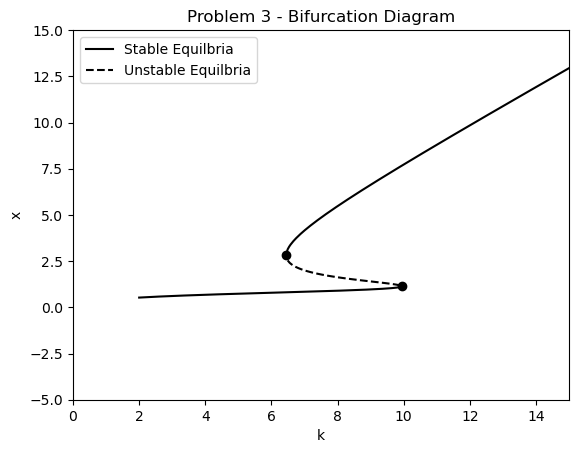

In [65]:
r = 0.56

# Element 1: the ODE function
def F(x,k):
    '''defines the code system'''
    return r * x * (1-x/k) - (x**2/(1+x**2))

# Get curves shown in the bifurcation diagram
C1, X1 = embedding_alg(np.linspace(6.449, 15, 200), 6.5, F)
C2, X2 = embedding_alg(np.linspace(2,10,200), 8, F)
C3, X3 = embedding_alg(np.linspace(9.9, -2, 200), 2.5 , F)


# Plot data
plt.plot(C1, X1, '-k', label = 'Stable Equilbria')
plt.plot(C2, X2, '-k')
plt.plot(C3, X3,'--k', label = 'Unstable Equilbria' )
plt.xlabel('k')
plt.ylabel('x')
plt.plot(9.93441,1.13911, 'ok')
plt.plot(6.44569, 2.8166, 'ok')
plt.xlim(0,15)
plt.ylim(-5, 15)
plt.title('Problem 3 - Bifurcation Diagram')
plt.legend()
plt.show()


# Problem 4
Using the time-dependent carrying-capacity

$k(t) = \begin{cases}
  8  & t \in [0,60) \\
  12  & t \in [60,150) \\
  8 & t \in [150,220) \\
  6 & t \in [220,300) \\
\end{cases},$

solve the IVP

$\frac{dx}{dτ} = rx(1 − x/k(t)) −\frac{x^2}{1 + x^2}$,

where $r = 0.56$ and $x(0)=x_0=0.3.$
Be sure to include a legend.

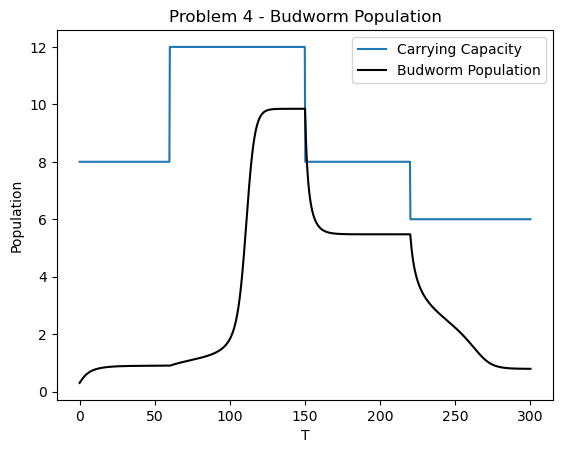

In [9]:
# Initialize variable
r = 0.56

# Define time-dependent carrying-capacity
def constant(t):
    if t >= 0 and t < 60:
        return 8
    elif t >= 60 and t < 150:
        return 12
    elif t >= 150 and t < 220:
        return 8
    else:
        return 6
    
# Element 1: the ODE function
def ode(t,y):
    time = t
    k = constant(time)
    
    return np.array([r * y * (1-y/k) - (y**2/(1+y**2))])

# Element 2: The Time Domain
t_span = (0,300)

# Element 3: The Initial Condition
y0 = np.array([0.3])

# Solve the Diff Equation
sol_1 = solve_ivp(ode, t_span, y0, max_step = 0.1)

# Get values for time and carrying capacity
t_values = np.linspace(t_span[0], t_span[1], 1000)
constant_values = [constant(t) for t in t_values]

# Plot data
plt.plot(t_values, constant_values, label = 'Carrying Capacity')
plt.plot(sol_1.t, sol_1.y[0], color = 'black', label = 'Budworm Population')
plt.xlabel('T')
plt.ylabel('Population')
plt.title('Problem 4 - Budworm Population')
plt.legend()
plt.show()